## Radarplots

AKA spiderplots AKA Dance Dance Revolution difficulty selector

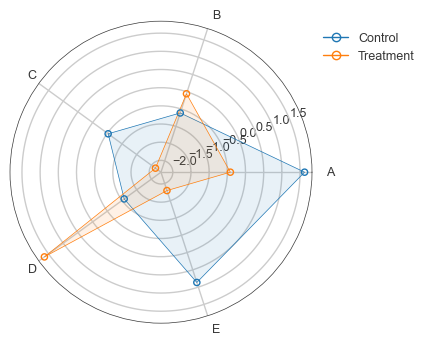

In [ ]:
def radarplot(categories, data, colors=None, title='', fill=True, facealpha=0.1):
    """Radarplot

    Parameters
    ----------
    categories: list of str
    data: dict
        key: str (name)
        value: np.array 
            - data points for each category
            - Can be 1D or 2D
            - rows = observations, columns=categories
    colors: list of matplotlib color
        - same length as data keys
    title: str
    fill: bool
    facealpha: float
    """
    
    theta_inc = (np.pi*2)/len(categories) # Angle between assays
    # theta = np.arange(0, np.pi*2, theta_inc)
    
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'projection': 'polar'}, dpi=100)
    # POLAR COORDINATES
    # X = theta
    # Y = r (radius)

    if not colors:
        colors = {sample: mpl.cm.tab10.colors[i] for i, sample in enumerate(data.keys())}
    if type(colors) == list:
        colors = {sample: color for sample, color in zip(data.keys(), colors)}
    
    for sample, values in data.items():
        r = []
        theta = []

        # Cast to numpy array
        if type(values) == list:
            values = np.array(values)

        # Cast to 2D array if 1D
        if len(values.shape) == 1:
            values = np.array([values])

        # For each set of observations
        for m in range(values.shape[0]):
            # For each category
            for k in range(values.shape[1]):
                r.append(values[m, k])
                theta.append(k * theta_inc)

        c = (colors[sample])
        # Reduce alpha of facecolor
        fc = tuple([x for x in c] + [facealpha])
        ec = tuple([x for x in c] + [1.0])
            
        if not fill:
            fc = 'none'
            
        ax.add_patch(mpl.patches.Polygon(
            np.vstack([theta, r]).T,
            facecolor=fc, edgecolor=ec, linewidth=0.5
        ))
        
        ax.scatter(
            theta, r, 
            facecolor='none', edgecolor=ec, s=20, 
            zorder=1000 # Plot over polygon patches
        )
        
    ax.set_xticks(theta)
    ax.set_xticklabels(categories)
    # Place labels on the outside of the plot
    # Check for left/right side of the circle
    for tick in ax.get_xticklabels():
        if tick._x > (np.pi/2) and tick._x < (3 * (np.pi/2)):
            tick.set_ha('right')
        else:
            tick.set_ha('left')
    
    # CUSTOM TICKS
    #rticks = np.arange(0, 1.1, 0.2)
    #ax.set_rlim([0, 1])
    #ax.set_rticks(rticks)
    # rgridlines, rgridlabels = ax.set_rgrids(rticks)
    # for line in rgridlines:
    #     line.set_linewidth(0.5)
    
    ax.set_title(title)
    
    legend_patches = [
        mpl.lines.Line2D([0], [0], color=colors[sample], marker='o', markerfacecolor='none', lw=1.)
        for sample in data.keys()
    ]
    ax.legend(legend_patches, list(data.keys()), 
              bbox_to_anchor=(1, 1), loc='upper left',
              frameon=False, facecolor='none')
    # plt.show()
    
    return fig, ax
    
    
fig, ax = radarplot(
    ['A', 'B', 'C', 'D', 'E'], 
    {
        'Control': norm.rvs(size=5, random_state=1),
        'Treatment': norm.rvs(size=5, random_state=2)
    }
)
plt.show()

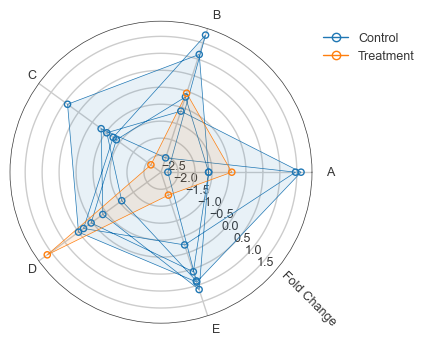

In [ ]:
fig, ax = radarplot(
    ['A', 'B', 'C', 'D', 'E'], 
    {
        'Control': np.reshape(norm.rvs(size=5*5, random_state=1), (5, 5)),
        'Treatment': norm.rvs(size=5, random_state=2)
    },
    
)

rlabel_pos = -1 * np.pi * (1/4)
rlabel='Fold Change'

# Radius Axis Label
if rlabel:
    ax.set_rlabel_position(np.rad2deg(rlabel_pos))
    ax.text(rlabel_pos + 0.1, 2., rlabel, 
            ha='left', va='top', rotation=np.rad2deg(rlabel_pos))
plt.show()